In [2]:
# Importng important libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd. set_option("display.max_columns", None)

In [4]:
df = pd.read_csv("/Users/juhimishra/Downloads/temperature.csv")
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,0.203896,0.161697,0.130928,0.0,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,0.251771,0.159444,0.127727,0.0,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,0.257469,0.204091,0.142125,0.0,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,0.226002,0.161157,0.134249,0.0,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,0.249995,0.178892,0.170021,0.0,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [5]:
print("No of Rows:",df.shape[0])
print("No of Columns:",df.shape[1])

No of Rows: 7752
No of Columns: 25


In [6]:
# Types of data insight
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


1. Only 1 object we found ie., date need to transform the same to datetime format
2. Lot many columns are having missing values

In [7]:
# Analysis of statistical data
df.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,0.356080,0.318404,0.299191,0.591995,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,0.258061,0.250362,0.254348,1.945768,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,0.140615,0.101388,0.081532,0.000000,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,0.312421,0.262555,0.227664,0.000000,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,0.558694,0.496703,0.499489,0.052525,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,0.968353,0.983789,0.974710,23.701544,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


1. Using info method we come across missing values same insight getting through describe will treat the same according
   to column
2. There are skewness in most of the columns as we can see mean and std columns are having huge difference between them
3. Max temp recorded was 20 - 37 degree
4. Min temp recorded was 11.30 - 29.90
5. For min humidity too we can see huge difference from min to max almost from 19 degree to 98 degree.

In [8]:
# Checking missing values using isna method 
df.isna().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(7588, 25)

In [11]:
# % of loss of data after deleting all nan rows
per_loss = ((7752-7588)/7752)*100
per_loss

2.1155830753353975

Approx 2% of data loss ard there so i deleted all the nan rows 

In [12]:
df.isna().sum()

station             0
Date                0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
dtype: int64

No null values

In [13]:
df_index=np.where(df['Present_Tmax'].isnull()==True)
new_df = df.loc[df_index]
new_df

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin


### Feature Engineering

In [14]:
# Converting Date (which is in object) to date format
df['Date']=pd.to_datetime(df['Date'])

In [15]:
df['Date'].dtype

dtype('<M8[ns]')

In [16]:
df['year']=df['Date'].dt.year
df['Month']=df['Date'].dt.month
df['Date']=df['Date'].dt.date

In [17]:
df.shape

(7588, 27)

# EDA

<AxesSubplot:xlabel='Present_Tmax', ylabel='Next_Tmax'>

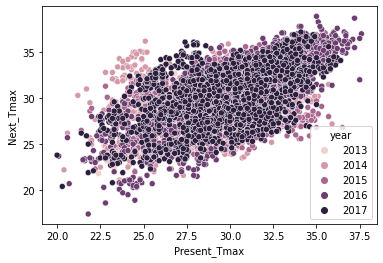

In [18]:
sns.scatterplot(x = 'Present_Tmax',y='Next_Tmax',hue = 'year',data=df)

Here comparing using previous year data what will be the next maximum temperature and as we can see that year 2017 is more visible
and highest temperature i.e., 37.5 was observed mainly in 2017 where we can consider that next temperature max can reach upto this or may exceed too

<AxesSubplot:xlabel='Month', ylabel='Present_Tmax'>

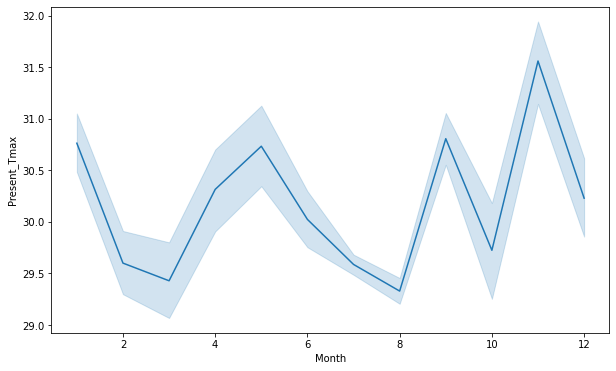

In [19]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month',y='Present_Tmax',data=df)

Max air temperature record shows that it rises mostly from oct to dec upto 31.5 

<AxesSubplot:xlabel='Present_Tmin', ylabel='Next_Tmin'>

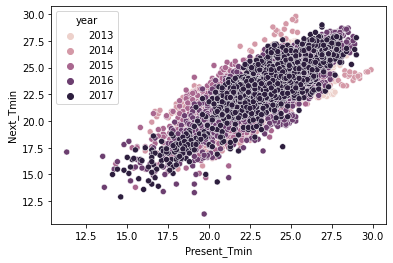

In [20]:
sns.scatterplot(x = 'Present_Tmin',y='Next_Tmin',hue = 'year',data=df)

from 17.5 to 30 degree min air temperature has been recorded so for predicting next tmin we can use this data thst how much min can be recorded for next min air temperature 

<AxesSubplot:xlabel='Month', ylabel='Present_Tmin'>

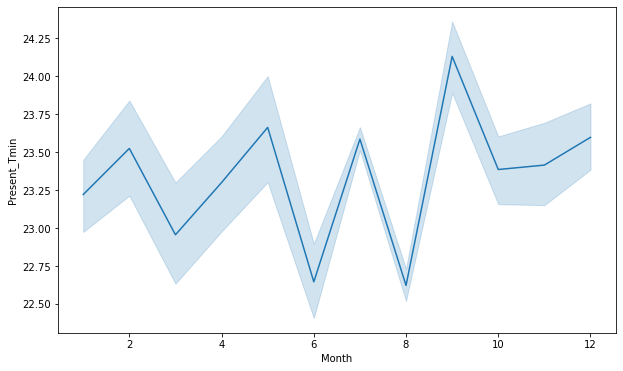

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(x = 'Month',y='Present_Tmin',data=df)

Min air temperature recorded was nearby 23 degree - 24 degree which raised mostly in the month oct that means air temperature
mostly shows increament from oct to dec which is winter season and from this we can predict that next tmin and tmax may happen mostly from oct to dec month

<AxesSubplot:xlabel='lat', ylabel='Present_Tmax'>

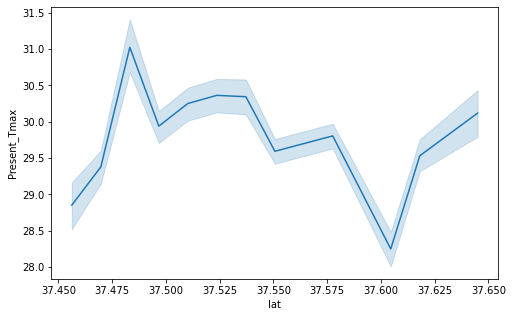

In [22]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lat',y='Present_Tmax',data=df)



Max air temperature recorded apprx on 37.5 latitude and lowest on 37.8 approx. But almost air temperature lies between 
28 - 30 degree in most of the latitude

<AxesSubplot:xlabel='lat', ylabel='Present_Tmin'>

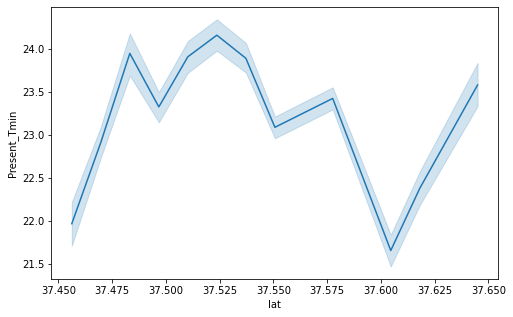

In [23]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lat',y='Present_Tmin', data=df)

Lowest record was on 37.600 latitude same as above i.e., 21.5 degree while highest air temperature was 24 degree on 37.525. That means this is the latitude where the tmin and tmax are highest or lowest

<AxesSubplot:xlabel='lat', ylabel='LDAPS_RHmin'>

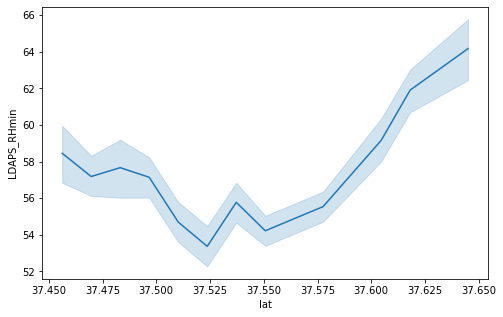

In [24]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lat',y='LDAPS_RHmin', data=df)

min relative humidity highest i.e.,66 was observed on 37.650 latitude and lowest was on 37.525 i.e., 53 degree approx

<AxesSubplot:xlabel='lat', ylabel='LDAPS_RHmax'>

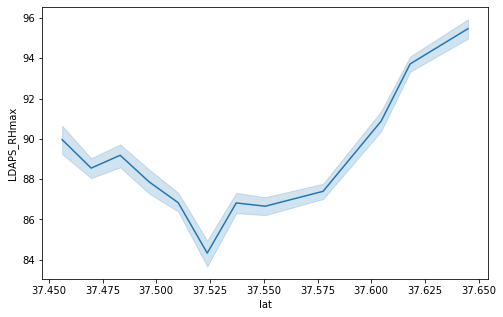

In [25]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lat',y='LDAPS_RHmax', data=df)

As min and max for any longitude or latitude will be the same because longitude and latitude for one city or location will be same 
so we got the same insight as was in longitude

<AxesSubplot:xlabel='lon', ylabel='LDAPS_RHmax'>

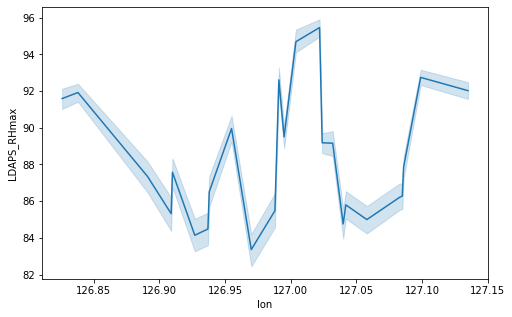

In [26]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lon',y='LDAPS_RHmax', data=df)

from the above insight came across max humidity was in approx 127 longitude area and that is approx 95 and minimum is approx 127 which is almost 83 degree

<AxesSubplot:xlabel='lon', ylabel='LDAPS_RHmin'>

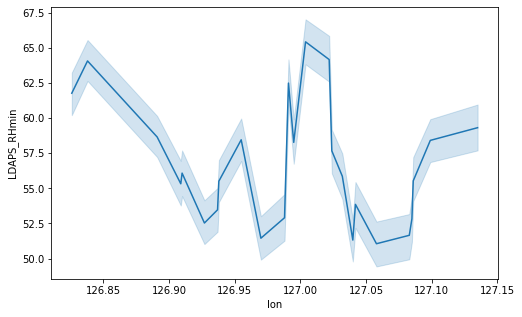

In [27]:
plt.figure(figsize=(8,5))
sns.lineplot(x = 'lon',y='LDAPS_RHmin', data=df)

Min and max same result but from here we can analyze that next humidity may be within this range as the trend shows range from 52-67 for min and for max 83-97 


<AxesSubplot:xlabel='lon', ylabel='LDAPS_Tmax_lapse'>

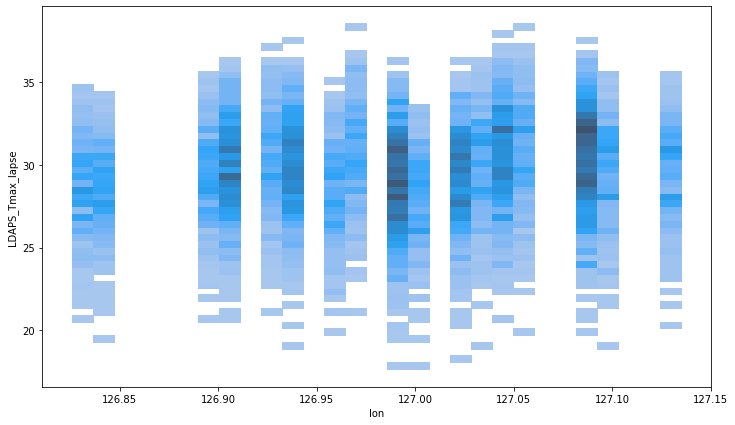

In [28]:
plt.figure(figsize=(12,7))
sns.histplot(x = 'lon',y='LDAPS_Tmax_lapse', data=df)

from all the insight came across that maximum air temperature lies n 127 longitude

<AxesSubplot:xlabel='lon', ylabel='LDAPS_Tmin_lapse'>

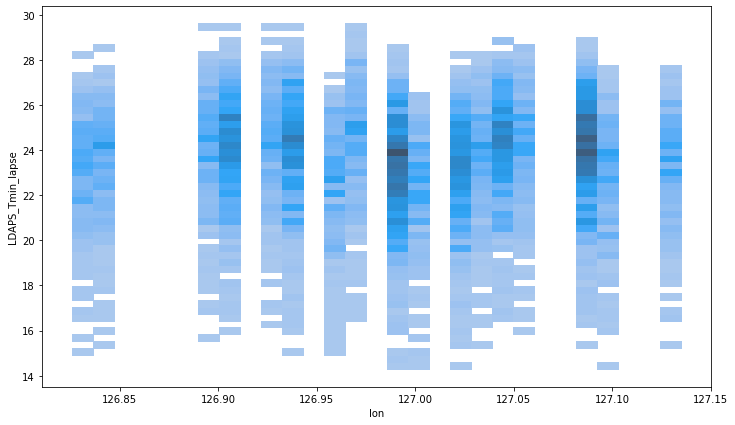

In [29]:
plt.figure(figsize=(12,7))
sns.histplot(x = 'lon',y='LDAPS_Tmin_lapse', data=df)

here also same result as above

<AxesSubplot:xlabel='lat', ylabel='LDAPS_WS'>

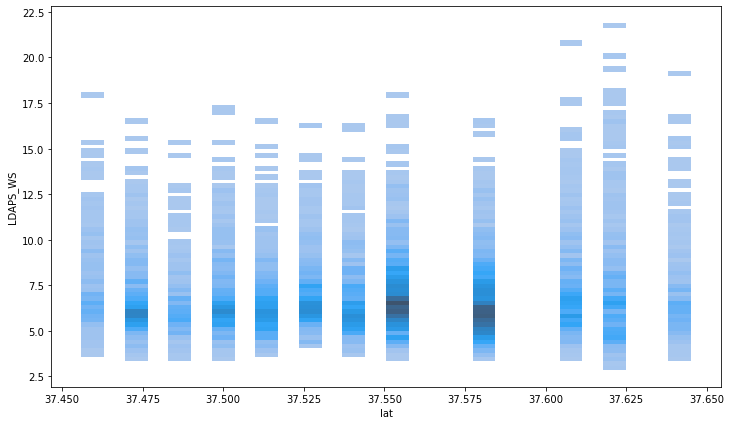

In [30]:
plt.figure(figsize=(12,7))
sns.histplot(x = 'lat',y='LDAPS_WS', data=df)

wind speed are maximum on 37.625 latitude while min is approx 37.5

<AxesSubplot:xlabel='lon', ylabel='LDAPS_WS'>

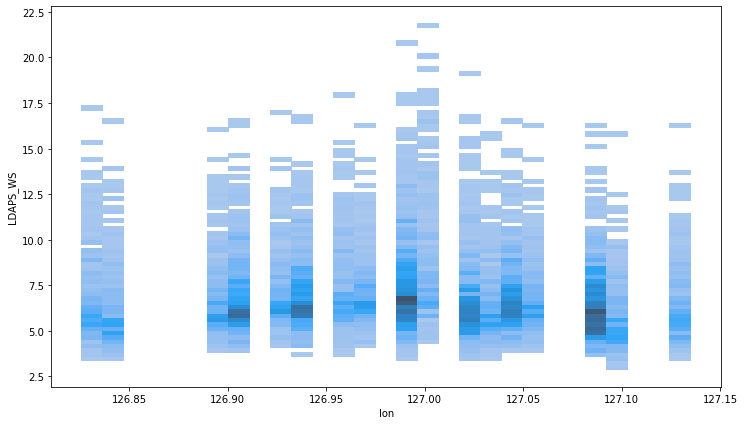

In [31]:
plt.figure(figsize=(12,7))
sns.histplot(x = 'lon',y='LDAPS_WS', data=df)

from begining we observed that max air temperature or max wind speed all lies on 127 longitude . That means here wind or air 
temperature are always on high speed compare to others

<AxesSubplot:xlabel='lon', ylabel='LDAPS_LH'>

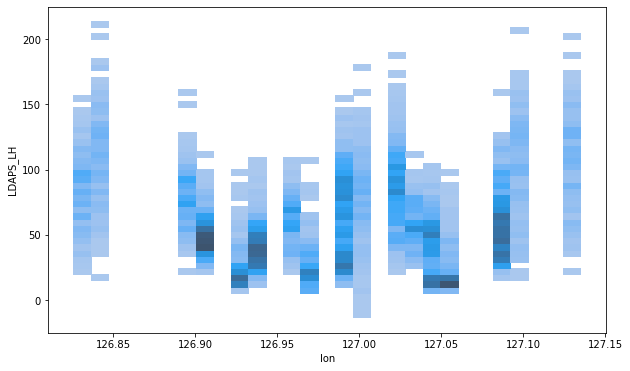

In [32]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'lon',y='LDAPS_LH', data=df)

<AxesSubplot:xlabel='lat', ylabel='LDAPS_LH'>

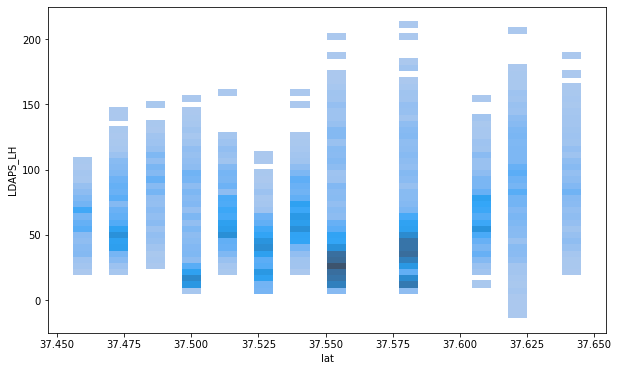

In [33]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'lat',y='LDAPS_LH', data=df)

Latent heat flux are max on 37.575 which is also common everywhere either for wind or air or heat flux

In [34]:
df.groupby("year")["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"].mean()

,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
year,,,,
2013,0.428907,0.400467,0.298776,0.267547
2014,0.357178,0.345044,0.302317,0.297987
2015,0.324259,0.333479,0.270449,0.254551
2016,0.374815,0.334842,0.343208,0.329807
2017,0.358392,0.364175,0.374527,0.342612


1st to 6hrs split average cloud cover was highest in the year 2013 and lowest was in 2015. for 2nd to 6hrs split cloud cover highest was in the year 2013 and lowest was 2015 almost both the weather condition were same in case of cloud cover. while for cc3 and cc4 lowest was same as cc1 and cc2 but highest reported in 2017 for both
so there is the change we can see in highest cloud cover 

<AxesSubplot:xlabel='year', ylabel='LDAPS_CC1'>

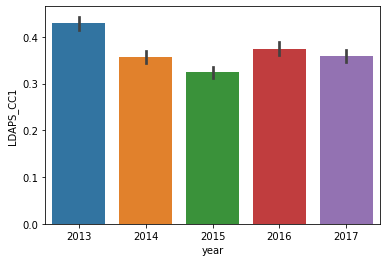

In [35]:

sns.barplot (x='year',y='LDAPS_CC1',data=df)

In the year 2013 1st 6 hrs split average cloud cover was more and least was in 2015

<AxesSubplot:xlabel='year', ylabel='LDAPS_CC2'>

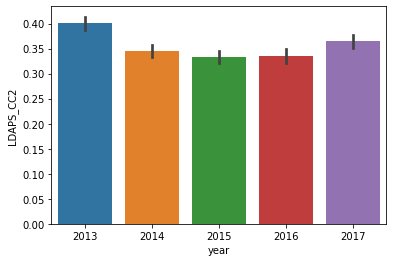

In [36]:
sns.barplot (x='year',y='LDAPS_CC2',data=df)

here also we can see that in the year 2013 2nd 6hrs average split of clod cover was higer rest all are almost on same label not much changes

<AxesSubplot:xlabel='year', ylabel='LDAPS_CC3'>

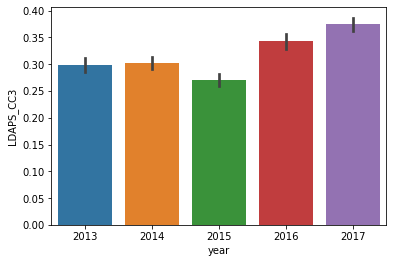

In [37]:
sns.barplot (x='year',y='LDAPS_CC3',data=df)

here we can see the changes for 3rd 6 hrs cloud cover average split which was higher in 2017 instead of 2013 that means in 3rd split it changed with yearand least was measured in 2015 which is similar to 1st 6hrs

<AxesSubplot:xlabel='year', ylabel='LDAPS_CC4'>

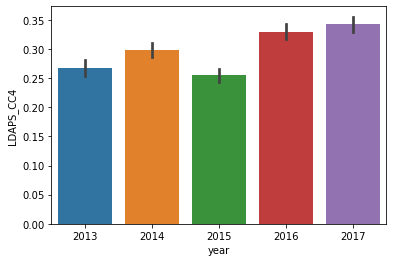

In [38]:
sns.barplot (x='year',y='LDAPS_CC4',data=df)

Here also having the same result as 3rd 6hrs cloud cover only the change we can see is 2016 and 2017 are almost on same label for 4th 6hrs 

In [39]:
df.groupby("Month")["LDAPS_CC1","LDAPS_CC2","LDAPS_CC3","LDAPS_CC4"].mean()

,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4
Month,,,,
1,0.498322,0.523928,0.416084,0.456257
2,0.441262,0.392986,0.409605,0.295078
3,0.334569,0.281008,0.284076,0.289489
4,0.348281,0.307397,0.254167,0.181380
5,0.290651,0.328152,0.246466,0.221811
6,0.316725,0.307100,0.315941,0.330313
7,0.420789,0.410587,0.325471,0.296202
8,0.314197,0.316614,0.306476,0.300371
9,0.463936,0.353608,0.325033,0.260063


By grouping all the average split of cloud cover are higher in the month of January and lowest for 1st , 2nd and 3rd are in october month while for 4th 6hrs it is recorded in the month of may 

<AxesSubplot:xlabel='Month', ylabel='LDAPS_CC1'>

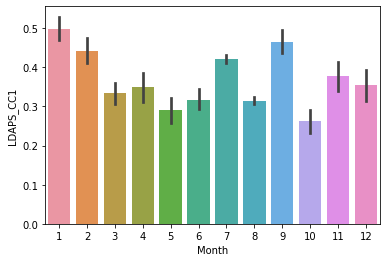

In [40]:
sns.barplot (x='Month',y='LDAPS_CC1',data=df)

Same we seen while grouping that for cc1 highest was recorded in the month of January

<AxesSubplot:xlabel='Month', ylabel='LDAPS_CC2'>

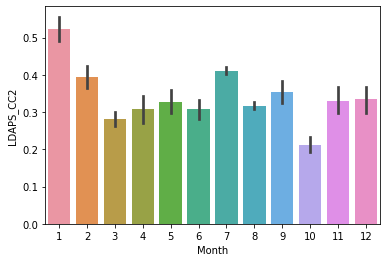

In [41]:
sns.barplot (x='Month',y='LDAPS_CC2',data=df)

For CC2 also we are having same insight January is highest and lowest is October

<AxesSubplot:xlabel='Month', ylabel='LDAPS_CC3'>

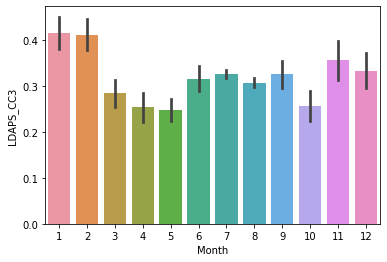

In [42]:
sns.barplot (x='Month',y='LDAPS_CC3',data=df)

While for cc3 both jan and feb has been recorded highest 

<AxesSubplot:xlabel='Month', ylabel='LDAPS_CC4'>

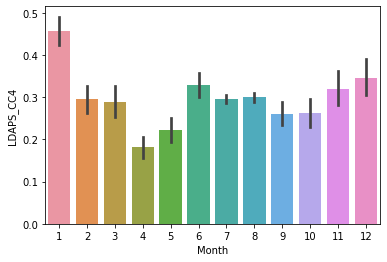

In [43]:
sns.barplot (x='Month',y='LDAPS_CC4',data=df)

For cc4 again january has been recorded highest So with this can be concluded that average split of cloud cover mostly seen in the month of january 

In [44]:
df.groupby("year")["LDAPS_PPT1","LDAPS_PPT2","LDAPS_PPT3","LDAPS_PPT4"].mean()

,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4
year,,,,
2013,1.300845,0.830756,0.190074,0.248509
2014,0.314214,0.351336,0.365857,0.240330
2015,0.320335,0.243135,0.061900,0.101055
2016,0.390442,0.529519,0.395318,0.443522
2017,0.627765,0.456253,0.364577,0.298776


By grouping precipitation insight what we came across in the year 2013 and 2014 precipitation / rainfall or snow fall according to place or climate was recorded highest for next day while for ppt3 an ppt4 highest recorded was in the year 2016 so here climate change is being seen with time 

<AxesSubplot:xlabel='year', ylabel='LDAPS_PPT1'>

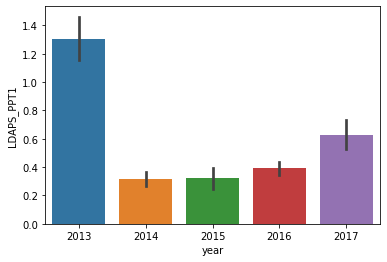

In [45]:
sns.barplot (x='year',y='LDAPS_PPT1',data=df)

in the year 2013 precipitation was recorded highest for next day 

<AxesSubplot:xlabel='year', ylabel='LDAPS_PPT2'>

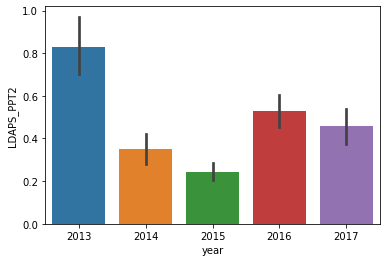

In [46]:
sns.barplot (x='year',y='LDAPS_PPT2',data=df)

same as above but in 2015 it has been recorded lowest while for ppt1 2014 and 2015 were equal so here we can see a change in weather

<AxesSubplot:xlabel='year', ylabel='LDAPS_PPT3'>

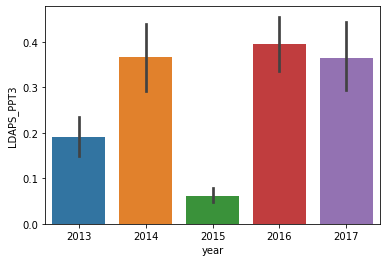

In [47]:
sns.barplot (x='year',y='LDAPS_PPT3',data=df)

here we can see huge change from last year as 2015 is constant though decreased more compare to last year but showing downfall only but here we can see a drastic change 
i.e., 2013 also shown huge downfall compare to PPT1 and PPT2 and here we can see 2016 being recorded highest 

<AxesSubplot:xlabel='year', ylabel='LDAPS_PPT4'>

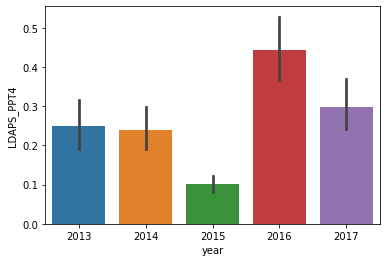

In [48]:
sns.barplot (x='year',y='LDAPS_PPT4',data=df)

Same as PPT3 but again one change can be observed that is 2017 is showing downfall compare to last year

In [49]:
df.groupby("year")["Next_Tmax","Next_Tmin"].mean()

,Next_Tmax,Next_Tmin
year,,
2013,30.094305,23.701457
2014,29.613445,21.964771
2015,30.370059,22.350228
2016,31.160523,23.419906
2017,29.993028,23.156175


from this grouping we can conclude what will be the next min max temp by looking previuos year data . As we can see that there
are not much change in air temperature for min and max so can't see much changes for next Tmin or next Tmax

In [50]:
df.groupby("Month")["Next_Tmax","Next_Tmin"].mean()

,Next_Tmax,Next_Tmin
Month,,
1,30.134137,23.091165
2,29.977642,22.749593
3,30.879757,23.059109
4,31.300000,23.444355
5,30.989431,22.751626
6,30.836944,22.652778
7,30.266331,23.481115
8,29.775715,22.159280
9,30.211741,23.335223


here also not have much differences 

In [55]:
df.columns

Index(['station', 'Date', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon',
       'DEM', 'Slope', 'Solar radiation', 'Next_Tmax', 'Next_Tmin', 'year',
       'Month'],
      dtype='object')

In [56]:
df.groupby("year")["Present_Tmax","Present_Tmin","LDAPS_RHmin","LDAPS_RHmax","LDAPS_Tmax_lapse","LDAPS_Tmin_lapse",
                  "LDAPS_WS","LDAPS_LH"].mean()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH
year,,,,,,,,
2013,29.730331,23.969868,60.743172,90.363752,29.899314,24.464587,7.849500,57.830844
2014,29.094182,22.218100,54.514229,89.445801,29.073107,22.521172,6.762374,62.895962
2015,29.750359,22.573255,52.334726,86.890396,29.503036,22.974537,7.084621,62.414944
2016,30.659920,23.737601,56.582018,87.351914,30.003228,23.849506,6.869707,66.760170
2017,29.533333,23.520983,59.577592,87.734379,29.641765,23.786339,6.909389,62.603577


from this insight want to get glance of changes in temperature from every aspect whether air or humidity or wind etc and with this insight came across
that in 2014 almost all are showing lower air temperature while the higher one is fluctuating every year 

In [58]:
# Dropping Date and Station as date already segregated after conversion and station is not reqired for our prediction
df.drop(columns=['Date','station'],inplace=True)

#### Checking Skewness in continuing column

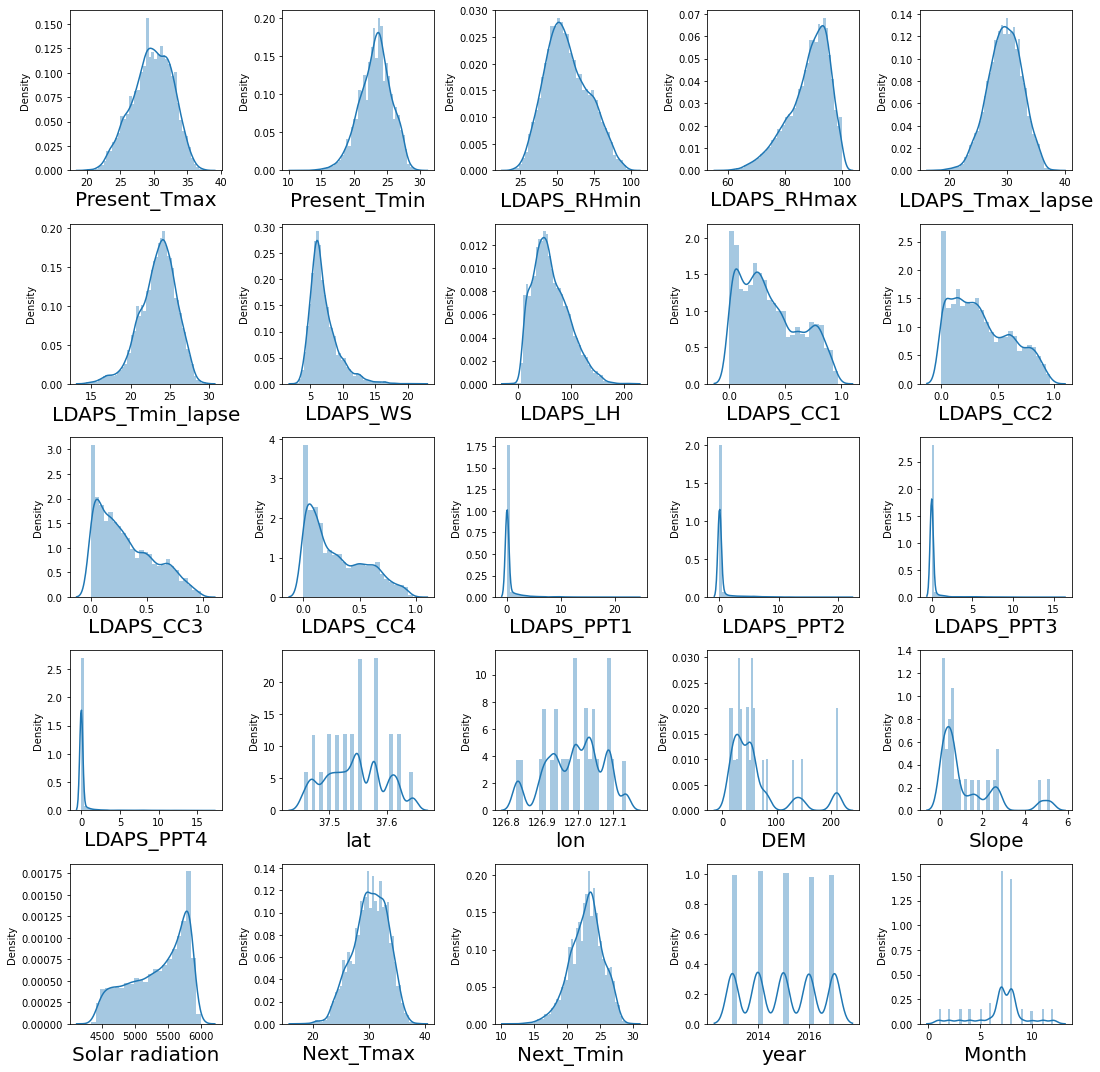

In [59]:
plt.figure(figsize = (15,15),facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=25:
        ax = plt.subplot(5,5,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize = 20)
        
    plotnumber+=1
plt.tight_layout()

Most of the columns are right skewed and few columns are at 0 which is not possible like LDAPS LH, LDAPS CC!, LDAPS CC2 so need to treat all those columns by removing skewness

In [60]:
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
year                0.013575
Month              -0.703092
dtype: float64

In [65]:
skew = ['LDAPS_RHmax','LDAPS_WS','LDAPS_LH','LDAPS_CC3','LDAPS_CC4','LDAPS_PPT1','LDAPS_PPT2','LDAPS_PPT3',
       'LDAPS_PPT4','DEM','Slope']

In [62]:
# Removing Skewness Using Power Transformer
from sklearn.preprocessing import PowerTransformer

In [63]:
scaler = PowerTransformer(method = 'yeo-johnson')
'''
Parameters:
method = 'box-cox' or 'yeo jhonson'

'''

"\nParameters:\nmethod = 'box-cox' or 'yeo jhonson'\n\n"

In [68]:
df[skew] = scaler.fit_transform(df[skew].values)

In [69]:
df.skew()

Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.085377
lon                -0.289048
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
year                0.013575
Month              -0.703092
dtype: float64

Removed skewness using power transformer

### Detecting Outliers

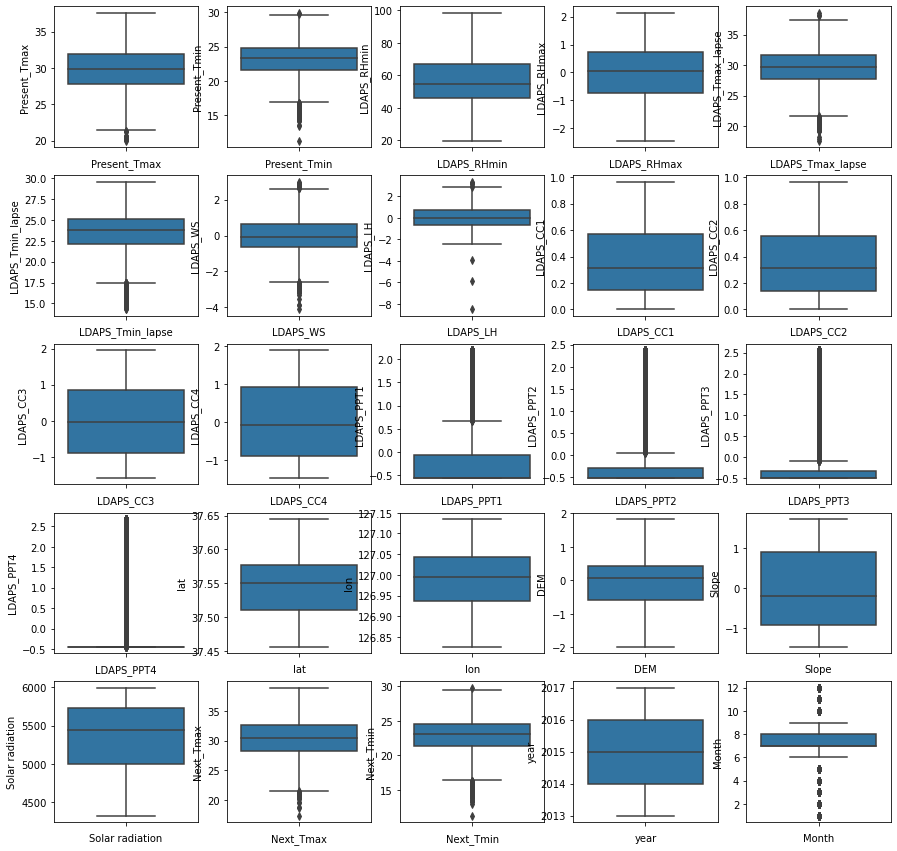

In [70]:
# Let's check outliers 
plt.figure(figsize=(15,15))

graph=1

for column in df.columns:
    if graph<=25:
        ax = plt.subplot(5,5,graph)
        sns.boxplot(y=df[column],orient='v') #orientation = v means vertical and if h that means horizontal
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [71]:
from scipy.stats import zscore

In [72]:
cont_out = df[['Present_Tmax','Present_Tmin','LDAPS_RHmax','LDAPS_Tmax_lapse','LDAPS_Tmin_lapse','LDAPS_WS',
               'LDAPS_LH','DEM']]

In [ ]:
# Droppinf column LDAPD_LH as almost all the columns are having null values
df.drop(columns=['LDAPS_LH'],inplace=True)

As did outliers all the rows become null so will not apply outliers in this situation

In [74]:
df.corr()

,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,LDAPS_CC2,LDAPS_CC3,LDAPS_CC4,LDAPS_PPT1,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,year,Month
Present_Tmax,1.000000,0.615208,-0.209059,-0.333055,0.573777,0.628705,-0.100297,0.122897,-0.316333,-0.216976,-0.134338,-0.128234,-0.191250,-0.157853,-0.110770,-0.108998,-0.054134,0.007695,-0.151065,-0.108008,-0.022114,0.610357,0.621048,0.056002,-0.003266
Present_Tmin,0.615208,1.000000,0.122200,-0.037023,0.467904,0.772061,-0.003488,-0.015316,0.084348,0.090038,0.002745,-0.033644,0.086817,0.069920,-0.010859,-0.099435,-0.081417,-0.045174,-0.251558,-0.169018,0.059765,0.463523,0.796975,0.037457,-0.010210
LDAPS_RHmin,-0.209059,0.122200,1.000000,0.598268,-0.569580,0.085237,0.230682,-0.042285,0.612831,0.744774,0.672119,0.509045,0.441484,0.582516,0.450928,0.305887,0.085027,-0.077590,0.066273,0.088997,0.242168,-0.446824,0.093249,-0.002147,-0.053499
LDAPS_RHmax,-0.333055,-0.037023,0.598268,1.000000,-0.403879,-0.145877,0.113579,0.243476,0.459068,0.409399,0.204294,0.119006,0.450406,0.402320,0.263510,0.179523,0.232675,0.017112,0.185220,0.218332,0.168636,-0.320924,-0.096277,-0.151334,-0.046730
LDAPS_Tmax_lapse,0.573777,0.467904,-0.569580,-0.403879,1.000000,0.653425,-0.228882,0.017712,-0.440878,-0.525380,-0.508598,-0.403508,-0.292572,-0.407879,-0.339117,-0.280835,-0.044052,0.091568,-0.131646,-0.123829,0.047414,0.835729,0.589963,0.020308,-0.022279
LDAPS_Tmin_lapse,0.628705,0.772061,0.085237,-0.145877,0.653425,1.000000,-0.069914,-0.143208,0.008714,0.046537,-0.014513,-0.052121,-0.027753,-0.010448,-0.084062,-0.152243,-0.099452,-0.024703,-0.188265,-0.172668,0.157763,0.592119,0.886513,-0.000564,-0.027050
LDAPS_WS,-0.100297,-0.003488,0.230682,0.113579,-0.228882,-0.069914,1.000000,-0.025201,0.240005,0.201485,0.123088,0.136578,0.234773,0.233627,0.154581,0.235523,0.002461,-0.070130,0.136419,0.122696,0.148539,-0.270957,-0.039561,-0.108548,-0.080836
LDAPS_LH,0.122897,-0.015316,-0.042285,0.243476,0.017712,-0.143208,-0.025201,1.000000,-0.121995,-0.235423,-0.226587,-0.161154,0.017162,-0.086791,0.002703,0.041758,0.109663,0.015618,0.037685,0.055124,-0.046488,0.136835,-0.064952,0.044934,-0.024875
LDAPS_CC1,-0.316333,0.084348,0.612831,0.459068,-0.440878,0.008714,0.240005,-0.121995,1.000000,0.779510,0.505287,0.357813,0.730634,0.606287,0.339258,0.254208,-0.010268,-0.007962,-0.018706,-0.023173,0.218285,-0.459705,-0.012877,-0.066233,-0.076819
LDAPS_CC2,-0.216976,0.090038,0.744774,0.409399,-0.525380,0.046537,0.201485,-0.235423,0.779510,1.000000,0.712743,0.522367,0.484834,0.713333,0.441398,0.300421,-0.002642,-0.004757,-0.016843,-0.020653,0.169346,-0.498295,0.030358,-0.045027,-0.091161


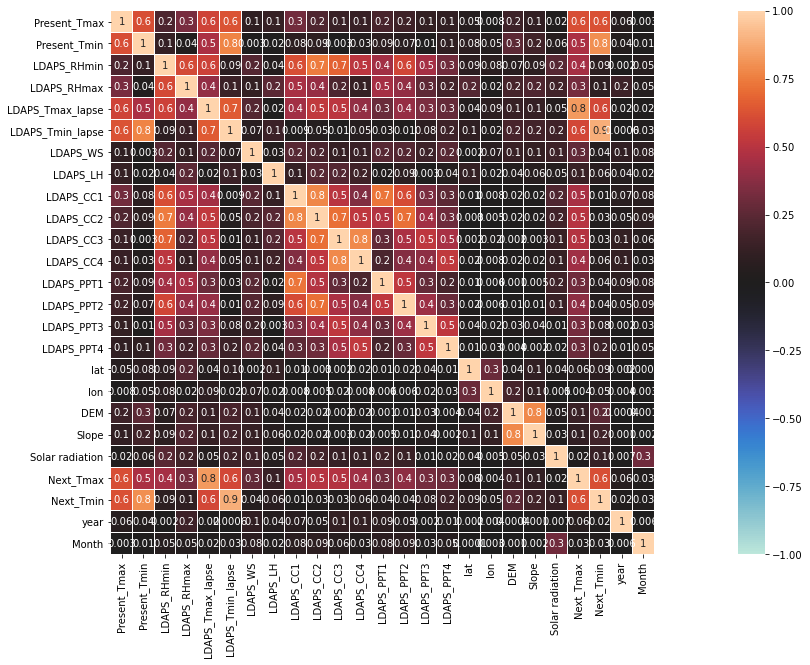

In [75]:
# Checking correlation with the help of heatmap
df_corr = df.corr().abs()

plt.figure(figsize = (30,10))
sns.heatmap(df_corr, vmin = -1,vmax = 1,annot=True,
           square = True,center = 0, fmt = '.1g',linewidths = .1,)
plt.show()


In [78]:
# Dropping these columns as having very less relation with target
df.drop(columns=["LDAPS_LH","LDAPS_CC4","Solar radiation"],inplace=True)

## Preprocessing

##### Predicting on next Tmax

In [79]:
x = df.drop(columns=['Next_Tmax'])
y = df['Next_Tmax']

X is our feature and y is target

In [80]:
scaler = StandardScaler()
x_scaler = scaler.fit_transform(x)
x_scaler

array([[-0.35331763, -0.74802891,  0.10466029, ..., -0.68926525,
        -1.41176669, -0.47636887],
       [ 0.72513836, -0.66472063, -0.3050523 , ..., -0.1655135 ,
        -1.41176669, -0.47636887],
       [ 0.62403311,  0.0433998 , -0.54934444, ...,  0.39852685,
        -1.41176669, -0.47636887],
       ...,
       [-2.17321212, -2.53915704, -2.05008127, ..., -1.93821173,
         1.42353686,  0.41559584],
       [-2.17321212, -2.28923218, -2.23473536, ..., -1.65619156,
         1.42353686,  0.41559584],
       [-2.20691387, -2.41419461, -2.310467  , ..., -2.2202319 ,
         1.42353686,  0.41559584]])

### Finding Best Random State

In [81]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,LassoCV,RidgeCV

In [82]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x_train,x_test,y_train,y_test = train_test_split(x_scaler,y,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x_train,y_train)
    pred = dt.predict(x_test)
    rsc = r2_score(y_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.8217937104486216 On Random state:  476


In [83]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.30,random_state=i)

In [84]:
lr = LinearRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print(r2_score(y_test,pred))

0.7879826500600127


In [85]:
print(cross_val_score(lr,x_scaler,y,cv=5).mean())

0.7043500672576316


In [86]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print(r2_score(y_test,pred))

0.7767082678456718


In [87]:
print(cross_val_score(dt,x_scaler,y,cv=5).mean())

0.4522281663508442


In [88]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print(r2_score(y_test,pred))

0.9029175482952155


In [89]:
print(cross_val_score(rf,x_scaler,y,cv=5).mean())

0.7020099572086032


### Checking whether my model is overfitting model or not using lasso and ridge


In [90]:
lassocv = LassoCV(alphas = None, max_iter=1000, normalize = True)
lassocv.fit(x_train,y_train)

LassoCV(normalize=True)

In [91]:
alpha = lassocv.alpha_
alpha

4.683819749217872e-05

In [92]:
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=4.683819749217872e-05)

In [93]:
lasso_reg.score(x_test,y_test)

0.7879860390420246

In [94]:
ridgecv = RidgeCV(alphas =(0.1,1.0,10.0),normalize = True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), normalize=True)

In [95]:
alpha = ridgecv.alpha_
alpha

0.1

In [96]:
ridge_reg = Ridge(alpha)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.1)

In [97]:
ridge_reg.score(x_test,y_test)

0.7879837892627258

Here best model performnce is for linear regression wo will tune this for better performance

### Hyperparameter Tuning

In [99]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [100]:
param = {'copy_X':[1,3,4,5,6],'fit_intercept':[True],'n_jobs':[-1],'normalize':[False]}

In [101]:
GC = GridSearchCV(lr,param,cv=5)

In [102]:
GC.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [1, 3, 4, 5, 6], 'fit_intercept': [True],
                         'n_jobs': [-1], 'normalize': [False]})

In [103]:
GC.best_params_

{'copy_X': 1, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [104]:
final_lr = LinearRegression(copy_X=1, fit_intercept='True', n_jobs=-1, normalize='False')
final_lr.fit(x_train,y_train)
pred = final_lr.predict(x_test)
score = r2_score(y_test,pred)
print(score*100)

78.79826500600127


## Predicting on the bsis of Tmin

In [106]:
x1 = df.drop(columns=['Next_Tmin'])
y1 = df['Next_Tmin']

In [107]:
scaler_new = StandardScaler()
x1_scaler = scaler_new.fit_transform(x1)
x1_scaler

array([[-0.35331763, -0.74802891,  0.10466029, ..., -0.36686121,
        -1.41176669, -0.47636887],
       [ 0.72513836, -0.66472063, -0.3050523 , ...,  0.08306779,
        -1.41176669, -0.47636887],
       [ 0.62403311,  0.0433998 , -0.54934444, ...,  0.27589451,
        -1.41176669, -0.47636887],
       ...,
       [-2.17321212, -2.53915704, -2.05008127, ..., -0.6239635 ,
         1.42353686,  0.41559584],
       [-2.17321212, -2.28923218, -2.23473536, ..., -0.52755014,
         1.42353686,  0.41559584],
       [-2.20691387, -2.41419461, -2.310467  , ..., -0.78465243,
         1.42353686,  0.41559584]])

In [108]:
maxscore = 0
maxrs = 0

for i in range(1,1000):
    x1_train,x1_test,y1_train,y1_test = train_test_split(x1_scaler,y1,test_size = 0.30,random_state = i)
    dt = DecisionTreeRegressor()
    dt.fit(x1_train,y1_train)
    pred = dt.predict(x1_test)
    rsc = r2_score(y1_test,pred)
    if rsc>maxscore:
        maxscore=rsc
        maxrs=i
print("Best r2 score is:",maxscore,"On Random state: ",maxrs)

Best r2 score is: 0.8230756085137823 On Random state:  327


In [109]:
x1_train,x1_test,y1_train,y1_test=train_test_split(x1_scaler,y1,test_size=0.30,random_state=i)

In [110]:
lr = LinearRegression()
lr.fit(x1_train,y1_train)
pred = lr.predict(x1_test)
print(r2_score(y1_test,pred))

0.8467417177763941


In [111]:
print(cross_val_score(lr,x1_scaler,y1,cv=5).mean())

0.8010550973995032


In [112]:
dt = DecisionTreeRegressor()
dt.fit(x1_train,y1_train)
pred = dt.predict(x1_test)
print(r2_score(y1_test,pred))

0.8131119061476821


In [113]:
print(cross_val_score(dt,x1_scaler,y1,cv=5).mean())

0.5825145935077015


In [114]:
rf = RandomForestRegressor()
rf.fit(x1_train,y1_train)
pred = rf.predict(x1_test)
print(r2_score(y1_test,pred))

0.9037236138018531


In [115]:
print(cross_val_score(rf,x1_scaler,y1,cv=5).mean())

0.794448044654035


In [117]:
from sklearn.svm import SVR

In [119]:
svr = SVR()
svr.fit(x1_train,y1_train)
pred = svr.predict(x1_test)
print(r2_score(y1_test,pred))

0.9132723050538503


In [120]:
print(cross_val_score(svr,x1_scaler,y1,cv=5).mean())

0.7418365027737306


Though r2 score for SVR and RandomForest regressor are higher but difference between CV and r2 score are lower compare to linear regression
so for Tmin too will consider Linear Regression as a best performing model as differnce between CV score and R2 score are lowest in this only

### Hyperparameter Tuning

In [121]:
lr = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [122]:
param = {'copy_X':[10,20,30,40,50,60],'fit_intercept':[True],'n_jobs':[-1],'normalize':[False]}

In [123]:
GC = GridSearchCV(lr,param,cv=5)

In [126]:
GC.fit(x1_train,y1_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'copy_X': [10, 20, 30, 40, 50, 60],
                         'fit_intercept': [True], 'n_jobs': [-1],
                         'normalize': [False]})

In [127]:
GC.best_params_

{'copy_X': 10, 'fit_intercept': True, 'n_jobs': -1, 'normalize': False}

In [128]:
final_lr = LinearRegression(copy_X=10, fit_intercept='True', n_jobs=-1, normalize='False')
final_lr.fit(x1_train,y1_train)
pred = final_lr.predict(x1_test)
score = r2_score(y1_test,pred)
print(score*100)

84.6741717776394


GOT SAME SCORE AS LINEAR REGRESSION

## Save the model

In [130]:
import joblib
joblib.dump(final_lr,'FinalmodelTemperature forecast.pk1')

['FinalmodelTemperature forecast.pk1']